<a href="https://colab.research.google.com/github/moch1996/MachineLearningProj/blob/master/assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#모듈
import numpy as np
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [60]:
print(device)

cuda


In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])

In [32]:
#parameters
learning_rate = 1e-04
training_epochs = 10
batch_size = 32

In [33]:
#MNIST DATA
training_set = datasets.MNIST(root = 'MNIST_data',
                             download=True,
                             train=True,
                             transform=transform
                             )
testing_set = datasets.MNIST(root = 'MNIST_data', 
                             train= False, 
                             download=True, 
                             transform= transform)

In [34]:
train_loader = torch.utils.data.DataLoader(dataset = training_set,
                                          batch_size=batch_size,
                                          shuffle = True,
                                          drop_last = True)
test_loader = torch.utils.data.DataLoader(dataset = testing_set,
                                          batch_size=batch_size,
                                          shuffle = True,
                                          drop_last = True)

In [11]:
len(train_loader)

468

In [35]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out

In [36]:
classifier = classification().to(device)
optimizer = torch.optim.SGD(classifier.parameters(), lr=1e-02)
criterion = nn.NLLLoss().to(device)

In [14]:
total_batch = len(data_loader)
total_batch

NameError: ignored

In [37]:
len(train_loader.dataset)

60000

In [38]:
training_loss_history = []
training_accuracy_history = []
testing_loss_history = []
testing_accuracy_history = []

In [39]:
classifier = classification().to(device)
optimizer = torch.optim.SGD(classifier.parameters(), lr=1e-02)
criterion = nn.NLLLoss().to(device)

In [59]:
epochs = 60

In [41]:
for epoch in range(1,epochs+1) :
    classifier.train()
    training_loss = 0
    training_correct = 0
    for i, (data,target) in enumerate(train_loader) :
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        result = classifier(data)

        loss   = F.nll_loss(result, target)
        training_loss += F.nll_loss(result, target, reduction = 'sum').item()

        prediction = result.max(dim = 1, keepdim = True)[1]
        training_correct += prediction.eq(target.view_as(prediction)).sum().item()

        loss.backward()

        optimizer.step()
    training_loss /= len(train_loader.dataset)
    training_accuracy = 100 * training_correct / len(train_loader.dataset)
    training_loss_history.append(training_loss)
    training_accuracy_history.append(training_accuracy)

    classifier.eval()
    testing_loss = 0
    testing_correct = 0
    with torch.no_grad() :
      for data, target in test_loader :
        data, target = data.to(device), target.to(device)
        
        result2 = classifier(data)

        loss2 = F.nll_loss(result2, target)
        testing_loss += F.nll_loss(result2, target,reduction = 'sum').item()

        prediction2 = result2.max(1, keepdim=True)[1]
        testing_correct += prediction2.eq(target.view_as(prediction2)).sum().item()
    testing_loss /= len(test_loader.dataset) 
    testing_accuracy = 100 * testing_correct / len(test_loader.dataset)
    testing_loss_history.append(testing_loss)
    testing_accuracy_history.append(testing_accuracy)

In [ ]:
training_accuracy_history

[32.92,
 66.12,
 81.37666666666667,
 86.18166666666667,
 88.18166666666667,
 89.23833333333333,
 89.95166666666667,
 90.54833333333333,
 90.95833333333333,
 91.34,
 91.67666666666666,
 92.0,
 92.32833333333333,
 92.57,
 92.86666666666666,
 93.1,
 93.38166666666666,
 93.62,
 93.90833333333333,
 94.13666666666667,
 94.33666666666667,
 94.53666666666666,
 94.73333333333333,
 94.92,
 95.09333333333333,
 95.23,
 95.41333333333333,
 95.57333333333334,
 95.71,
 95.845,
 95.98166666666667,
 96.045,
 96.185,
 96.31333333333333,
 96.39666666666666,
 96.54,
 96.61333333333333,
 96.71166666666667,
 96.84333333333333,
 96.92833333333333,
 97.01,
 97.04,
 97.15333333333334,
 97.22166666666666,
 97.275,
 97.36833333333334,
 97.405,
 97.49,
 97.57333333333334,
 97.61166666666666,
 97.67,
 97.73833333333333,
 97.785,
 97.85666666666667,
 97.93,
 97.98833333333333,
 98.04166666666667,
 98.07666666666667,
 98.15,
 98.17666666666666]

In [ ]:
trn_loss_list = []
trn_acc = []
for epoch in range(60) :
    classifier.train()
    trn_loss = 0
    trn_accuracy = 0
    for i,data in data_loader :
        
        i = i.cuda()
        data = data.cuda()

        optimizer.zero_grad()

        model_output = classifier(i)

        loss = criterion(model_output, data)
        loss.backward()
        optimizer.step()

        trn_loss += loss.item()
    trn_loss_list.append(trn_loss/total_batch)
    classifier.eval()
    with torch.no_grad() :
      x_train = training_set.train_data.view(len(training_set),1,28,28).float().to(device)
      y_train = training_set.train_labels.to(device)

      pred = classifier(x_train)
      correct = torch.argmax(pred,1) == y_train
      trn_accuracy = correct.float().mean()
      trn_acc.append(trn_accuracy*100)

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
training_set.train

True

In [ ]:
trn_loss

104.22626344277523

In [ ]:
trn_acc

[tensor(89.2183, device='cuda:0'),
 tensor(89.7533, device='cuda:0'),
 tensor(91.0650, device='cuda:0'),
 tensor(91.0567, device='cuda:0'),
 tensor(91.7367, device='cuda:0'),
 tensor(92.1550, device='cuda:0'),
 tensor(92.4783, device='cuda:0'),
 tensor(92.6683, device='cuda:0'),
 tensor(93.2117, device='cuda:0'),
 tensor(93.4200, device='cuda:0'),
 tensor(93.5183, device='cuda:0'),
 tensor(93.8650, device='cuda:0'),
 tensor(94.2200, device='cuda:0'),
 tensor(94.4217, device='cuda:0'),
 tensor(94.4650, device='cuda:0'),
 tensor(94.5150, device='cuda:0'),
 tensor(94.4800, device='cuda:0'),
 tensor(94.3767, device='cuda:0'),
 tensor(94.2167, device='cuda:0'),
 tensor(94.4333, device='cuda:0'),
 tensor(94.6867, device='cuda:0'),
 tensor(94.6083, device='cuda:0'),
 tensor(94.4667, device='cuda:0'),
 tensor(94.3650, device='cuda:0'),
 tensor(94.1883, device='cuda:0'),
 tensor(94.7183, device='cuda:0'),
 tensor(94.4017, device='cuda:0'),
 tensor(93.8817, device='cuda:0'),
 tensor(94.2983, dev

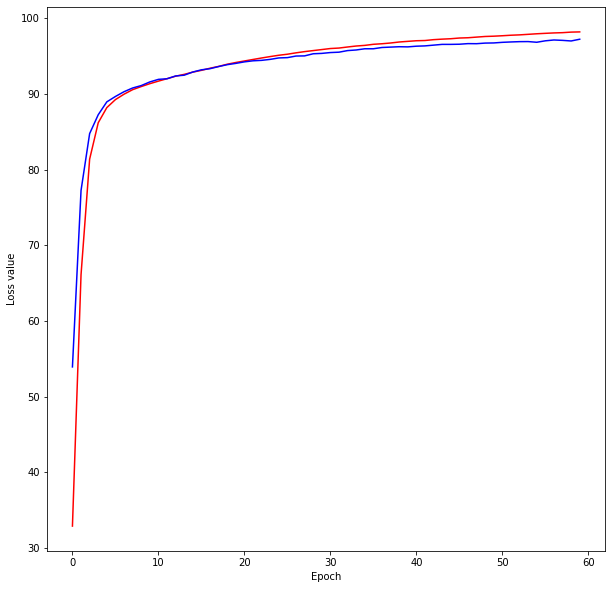

In [ ]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(60)), training_accuracy_history, c='r')
plt.plot(np.array(range(60)), testing_accuracy_history, c='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()

In [ ]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(60)), training_loss_history, c='r',label='Train loss')
plt.plot(np.array(range(60)), testing_loss_history, c='blue',label='Test loss')
plt.xlabel('Epoch')
plt.title('Batch size = 32',fontsize = 20)
plt.legend(fontsize =20, loc='best')
#plt.rc('xtick', labelsize = 15)
#plt.rc('ytick', labelsize = 15)
plt.show()

In [42]:
#32 미니배치
tst_a_32 = testing_accuracy
tst_l_32 = testing_loss
trn_a_32 = training_accuracy
trn_l_32 = training_loss
print(tst_a_32)
print(tst_l_32)
print(trn_a_32)
print(trn_l_32)

97.19
0.08864368638545275
98.19166666666666
0.06841041080504656


In [31]:
#tst_a_64 = testing_accuracy
#tst_l_64 = testing_loss
#trn_a_64 = training_accuracy
#trn_l_64 = training_loss
print(tst_a_64)
print(tst_l_64)
print(trn_a_64)
print(trn_l_64)

95.44
0.1516568533182144
95.79833333333333
0.14631747073133786


In [21]:
#tst_a_128 = testing_accuracy
#tst_l_128 = testing_loss
#trn_a_128 = training_accuracy
#trn_l_128 = training_loss
print(tst_a_128)
print(tst_l_128)
print(trn_a_128)
print(trn_l_128)

92.83
0.24079585542678833
92.8
0.24348000405629475


#OUTPUT

1.Plot the training and testing losses with a batch size of 32 [4pt]

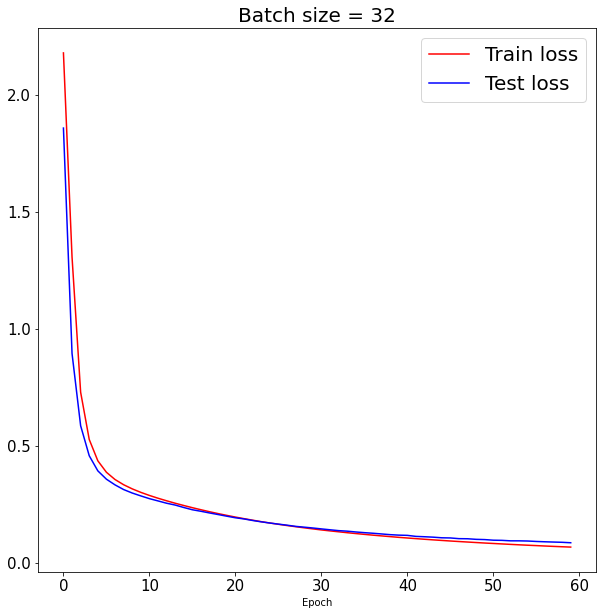

In [ ]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(60)), training_loss_history, c='r',label='Train loss')
plt.plot(np.array(range(60)), testing_loss_history, c='blue',label='Test loss')
plt.xlabel('Epoch')
plt.title('Batch size = 32',fontsize = 20)
plt.legend(fontsize =20, loc='best')
plt.show()

2.Plot the training and testing accuracies with a batch size of 32 [4pt]

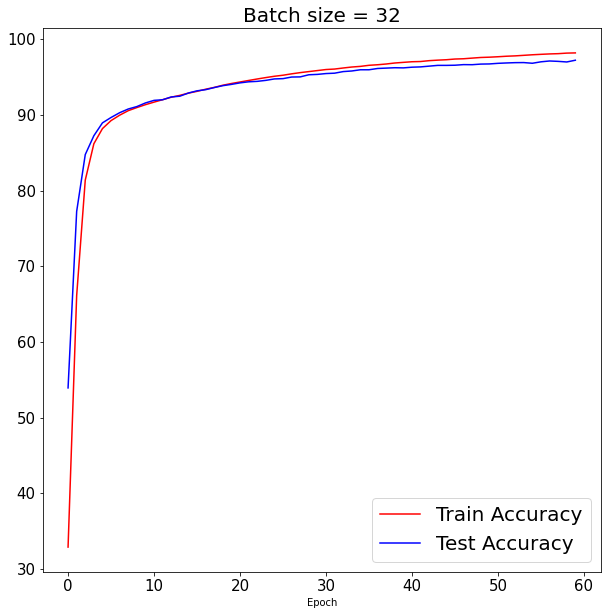

In [ ]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(60)), training_accuracy_history, c='r',label='Train Accuracy')
plt.plot(np.array(range(60)), testing_accuracy_history, c='blue',label='Test Accuracy')
plt.xlabel('Epoch')
plt.title('Batch size = 32',fontsize = 20)
plt.legend(fontsize =20, loc='best')
plt.show()

3.Plot the training and testing losses with a batch size of 64 [4pt]

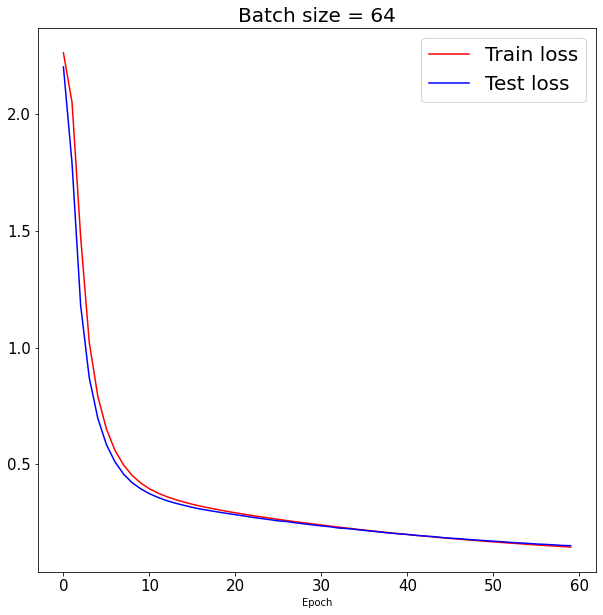

In [ ]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(60)), training_loss_history, c='r',label='Train loss')
plt.plot(np.array(range(60)), testing_loss_history, c='blue',label='Test loss')
plt.xlabel('Epoch')
plt.title('Batch size = 64',fontsize = 20)
plt.legend(fontsize =20, loc='best')
plt.show()

4.Plot the training and testing accuracies with a batch size of 64 [4pt]


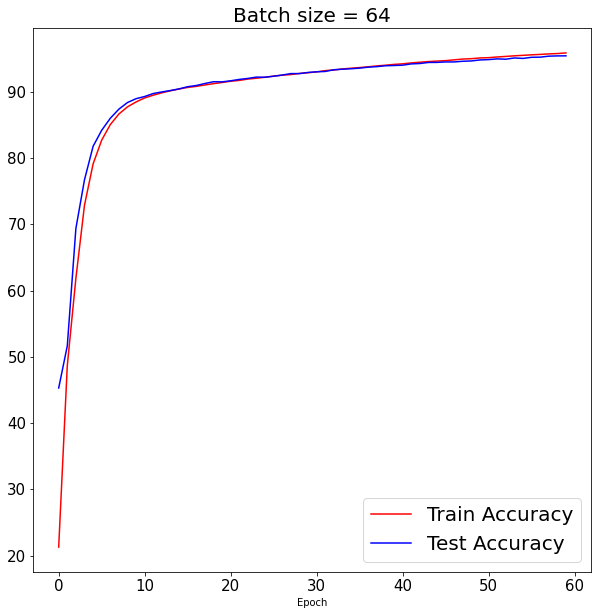

In [ ]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(60)), training_accuracy_history, c='r',label='Train Accuracy')
plt.plot(np.array(range(60)), testing_accuracy_history, c='blue',label='Test Accuracy')
plt.xlabel('Epoch')
plt.title('Batch size = 64',fontsize = 20)
plt.legend(fontsize =20, loc='best')
plt.show()

5.Plot the training and testing losses with a batch size of 128 [4pt]

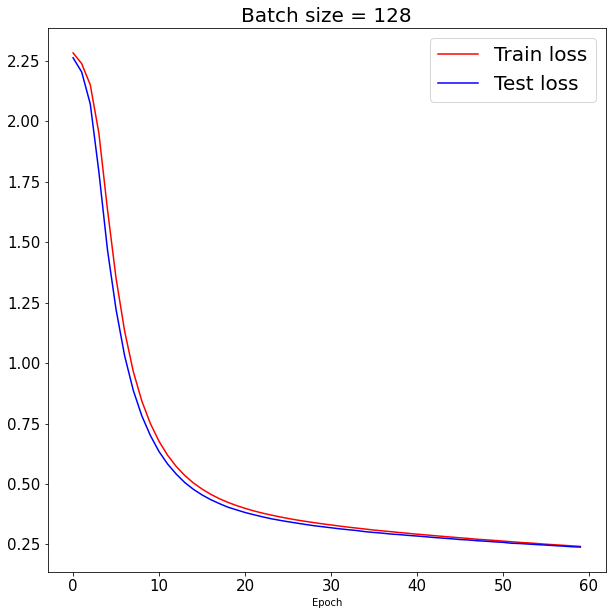

In [ ]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(60)), training_loss_history, c='r',label='Train loss')
plt.plot(np.array(range(60)), testing_loss_history, c='blue',label='Test loss')
plt.xlabel('Epoch')
plt.title('Batch size = 128',fontsize = 20)
plt.legend(fontsize =20, loc='best')
plt.show()

6.Plot the training and testing accuracies with a batch size of 128 [4pt]

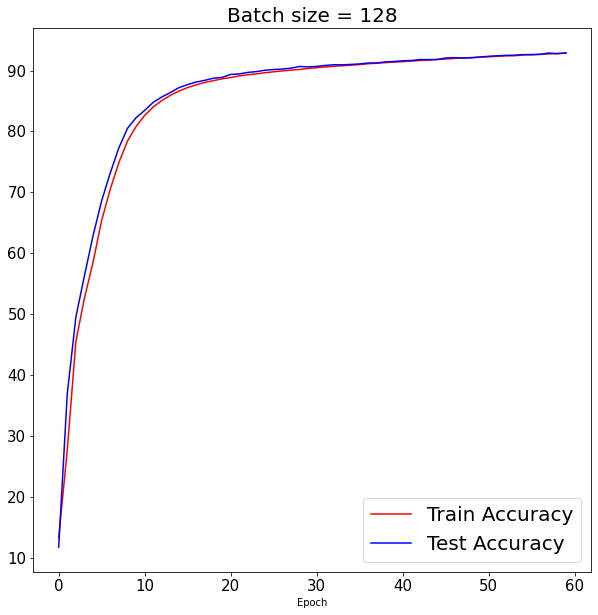

In [ ]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(60)), training_accuracy_history, c='r',label='Train Accuracy')
plt.plot(np.array(range(60)), testing_accuracy_history, c='blue',label='Test Accuracy')
plt.xlabel('Epoch')
plt.title('Batch size = 128',fontsize = 20)
plt.legend(fontsize =20, loc='best')
plt.show()

7.Print the loss at convergence with different mini-batch sizes [3pt]

In [50]:
print("[Training Loss]")
print("")
print("Mini-batch Size : 32   =", trn_l_32)
print("Mini-batch Size : 64   =", trn_l_64)
print("Mini-batch Size : 128  =", trn_l_128)
print("---------------------------------------------")
print("[Testing Loss]")
print("")
print("Mini-batch Size : 32   =", tst_l_32)
print("Mini-batch Size : 64   =", tst_l_64)
print("Mini-batch Size : 128  =", tst_l_128)


[Training Loss]

Mini-batch Size : 32   = 0.06841041080504656
Mini-batch Size : 64   = 0.14631747073133786
Mini-batch Size : 128  = 0.24348000405629475
---------------------------------------------
[Testing Loss]

Mini-batch Size : 32   = 0.08864368638545275
Mini-batch Size : 64   = 0.1516568533182144
Mini-batch Size : 128  = 0.24079585542678833


8.Print the accuracy at convergence with different mini-batch sizes [3pt]

In [58]:
print("[Training Accuracy]")
print("")
print("Mini-batch Size : 32   =", trn_a_32)
print("Mini-batch Size : 64   =", trn_a_64)
print("Mini-batch Size : 128  =", trn_a_128)
print("---------------------------------------------")
print("[Testing Accuracy]")
print("")
print("Mini-batch Size : 32   =", tst_a_32)
print("Mini-batch Size : 64   =", tst_a_64)
print("Mini-batch Size : 128  =", tst_a_128)


[Training Accuracy]

Mini-batch Size : 32   = 98.19166666666666
Mini-batch Size : 64   = 95.79833333333333
Mini-batch Size : 128  = 92.8
---------------------------------------------
[Testing Accuracy]

Mini-batch Size : 32   = 97.19
Mini-batch Size : 64   = 95.44
Mini-batch Size : 128  = 92.83
